## This notebook will contain the credits analysis

In [1]:
# Import the libraries that will be used within the code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
from sklearn.preprocessing import StandardScaler


In [2]:
# Data is imported

path = 'C:/Users/j.renza/OneDrive - Solvo a Turia Group Company/Credit Memos Data/'

Clients = pd.read_excel(path + 'Client_Data.xlsx')

Departments = pd.read_excel(path + 'Credit_Reasons_by_Department.xlsx')

Credits = pd.read_excel(path + 'CreditMemos.xlsx')



In [3]:
Clients.head()

,CustomerCode,Client_Name
0,HKSEIN,ESTRELLA SUPERMERCADO
1,HRTIRG,EL MARISCO GRILL LLC
2,HKVPRR,TIENDA MEXICANA EL CHAPARRO
3,NRAFPE,FRONTERA PEACHTREE
4,HKVLIL,LILY'S CARNICERIA


In [4]:
Departments.head()

,CRR,Dpt
0,Not ordered (Sales/TLMKT),Sales
1,Wrong Item (Sales/TLMKT),Sales
2,Wrong Item (Customer),Client
3,Wrong Item (Plant),Warehouse
4,Wrong Brand,Purchasing/Warehouse


In [5]:
Credits.head()

,Date,CreditReason,CustomerCode,State,CountInvoice,NetWeight,Sales
0,2018-01-02,Wrong Item (Sales/TLMKT),HKSEIN,SC,1,40.00,127.60
1,2018-01-02,Wrong Item (Sales/TLMKT),HRTIRG,TN,1,66.00,164.34
2,2018-01-02,Wrong Item (Customer),HKVPRR,VA,1,40.50,32.00
3,2018-01-02,Wrong Item (Customer),NRAFPE,GA,1,7.14,121.49
4,2018-01-02,Wrong Brand,HKVLIL,VA,1,341.70,1844.84


In [6]:
# Credits by Month

init_date = '2023-05-01'

end_date = '2023-05-31'

In [7]:
CreditsJune2023 = Credits[(Credits.Date >= init_date) & (Credits.Date <= end_date)]

CreditsJune2023.reset_index(drop = True, inplace = True)

In [8]:
Temp1 = CreditsJune2023.merge(Clients, right_on = 'CustomerCode', left_on = 'CustomerCode', how = 'inner')

In [9]:
CreditsJune2023 = Temp1.merge(Departments, right_on = 'CRR', left_on = 'CreditReason', how = 'inner')

In [10]:
CreditsJune2023 = CreditsJune2023[['Date', 'CRR', 'CustomerCode', 'Client_Name', 'State', 'CountInvoice', 'NetWeight', 'Sales', 'Dpt']]

In [11]:
CreditsJune2023.head()

,Date,CRR,CustomerCode,Client_Name,State,CountInvoice,NetWeight,Sales,Dpt
0,2023-05-01,Wrong Brand,HRGFIA,COCINA SOFIA ROSWELL,GA,1,206.14,368.99,Purchasing/Warehouse
1,2023-05-04,Wrong Brand,HKVORI,LA VICTORIA TIENDA,VA,1,80.00,287.20,Purchasing/Warehouse
2,2023-05-31,Wrong Brand,HKVEMA,E MART,VA,1,238.26,855.35,Purchasing/Warehouse
3,2023-05-09,Wrong Brand,HRKEET,EL DORADO STREET TACOS FOOD TRUCK,KY,1,147.60,662.72,Purchasing/Warehouse
4,2023-05-11,Wrong Brand,HKNTOR,EL TORO CARNICERIA,NC,1,300.00,927.00,Purchasing/Warehouse


In [12]:
round(CreditsJune2023.Sales.sum(),2)

154659.17

In [13]:
SpoilageCustomer = CreditsJune2023[CreditsJune2023.CRR == 'Spoilage - Customer']

In [14]:
SpoilageCustomer.Sales.sum()

16591.69

In [15]:
SpoilageCustomer.Sales.sum()/CreditsJune2023.Sales.sum()

0.10727905755604403

In [16]:
dataSC = SpoilageCustomer.groupby(by = 'State', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

In [61]:
6119.79/SpoilageCustomer.Sales.sum()

0.3688466937364428

### Spoilage - Customer

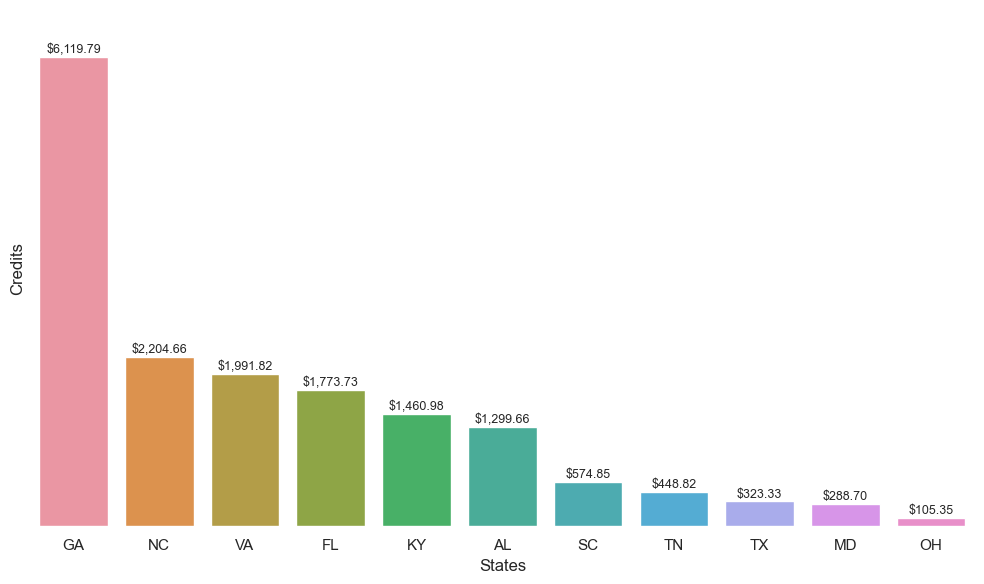

In [18]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='State', y='Sales', data=dataSC)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('States')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=dataSC['Sales'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('SCbyState.jpg')

plt.show()

## Bad Appearance

In [19]:
CreditsJune2023.CRR.unique()

array(['Wrong Brand', 'Old CM, Not Notified.', 'Spoilage - Customer',
       'Not In Truck', 'Wrong Item (Sales/TLMKT)',
       'Ordered, But Not Wanted', 'Inadequate Expiration Date',
       'Not In Truck/Wrong Truck', 'Not In Truck/Wrong Customer',
       'Wrong Item (Plant)', 'Cut Out Of Specs (Processing)',
       'Bad Appearance', 'Not ordered (Sales/TLMKT)',
       'Not In Truck/End Route', 'Substituted, Rejected for Cust',
       'Spoilage - PM', 'Business Closed', 'Wrong Item (Customer)',
       'Not In Time', 'Maltreated/Mold', 'Billing Error',
       'Weight Not Required', 'Wrongly Invoiced'], dtype=object)

In [20]:
BadAppearance = CreditsJune2023[CreditsJune2023.CRR == 'Bad Appearance']

In [21]:
BadAppearance.Sales.sum()

19314.660000000003

In [22]:
BadAppearance.Sales.sum()/CreditsJune2023.Sales.sum()

0.1248853204113277

In [23]:
dataBA = BadAppearance.groupby(by = 'State', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

In [62]:
18223.89/BadAppearance.Sales.sum()

0.9435263162799654

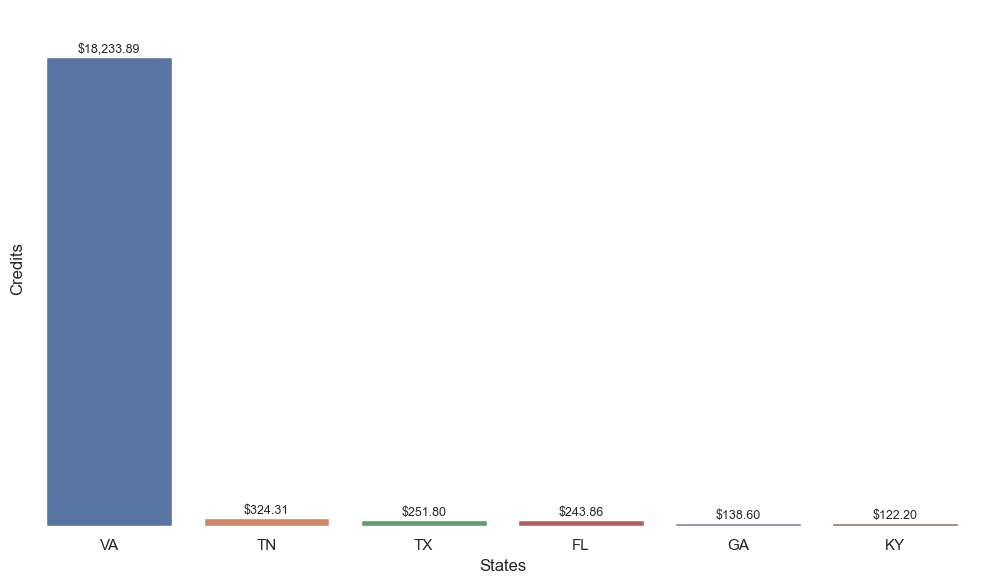

In [25]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='State', y='Sales', data=dataBA)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('States')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=dataBA['Sales'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('BAbyState.jpg')

plt.show()

## Spoilage PM

In [26]:
SpoilagePM = CreditsJune2023[CreditsJune2023.CRR == 'Spoilage PM']

In [27]:
SpoilagePM

,Date,CRR,CustomerCode,Client_Name,State,CountInvoice,NetWeight,Sales,Dpt


## Statistical Behavior

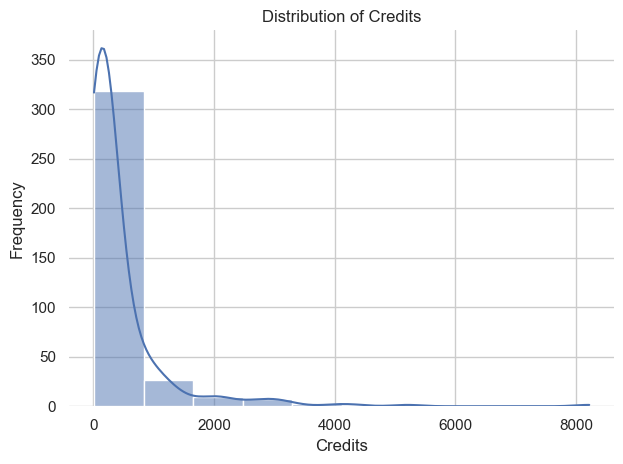

In [28]:
# Creating the histogram
sns.histplot(data= CreditsJune2023, x ='Sales', bins=10, kde=True)

# Customizing the plot
plt.title('Distribution of Credits')  # Adding a title to the plot
plt.xlabel('Credits')  # Adding a label to the x-axis
plt.ylabel('Frequency')  # Adding a label to the y-axis

# plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('HistogramCredits2023.jpg')
plt.show()

In [29]:
#  Scatterplot Sales Vs Credits

Sales = pd.read_excel(path + 'Sales2023.xlsx')

In [30]:
# Sales['Date'] = Sales.Date.astype('str')

In [31]:
SalesApril2023 = Sales[(Sales.Date >= init_date) & (Sales.Date <= end_date)]

SalesApril2023.reset_index(drop = True, inplace = True)

In [32]:
SalesApril2023.head()

,Date,Day,Sales
0,2023-05-01,Monday,1146538.85
1,2023-05-02,Tuesday,1120491.49
2,2023-05-03,Wednesday,1014244.24
3,2023-05-04,Thursday,1044876.07
4,2023-05-05,Friday,596836.17


In [33]:
# SalesApril2023 = SalesApril2023.rename(columns= {'Sales': 'Credits'})

In [34]:
SalesApril = SalesApril2023.groupby(by = 'Date', as_index = False)['Sales'].sum()

In [35]:
CreditsJune2023 = CreditsJune2023.rename(columns= {'Sales': 'Credits'})

In [36]:
CreditsSalesApril2023 = CreditsJune2023.merge(SalesApril2023, right_on = 'Date', left_on = 'Date', how = 'right')

In [37]:
CreditsSalesApril2023.head()

,Date,CRR,CustomerCode,Client_Name,State,CountInvoice,NetWeight,Credits,Dpt,Day,Sales
0,2023-05-01,Wrong Brand,HRGFIA,COCINA SOFIA ROSWELL,GA,1.0,206.14,368.99,Purchasing/Warehouse,Monday,1146538.85
1,2023-05-01,"Old CM, Not Notified.",HRNIAI,TAQUERIA RINCON LATINO,NC,1.0,0.00,190.62,Sales,Monday,1146538.85
2,2023-05-01,"Old CM, Not Notified.",HRVERO,VERONICAS FOOD TRUCK,VA,1.0,0.00,377.80,Sales,Monday,1146538.85
3,2023-05-01,Not In Truck,HRFDIA,DIANAS MEXICAN FOOD,FL,1.0,0.00,46.00,Logistics,Monday,1146538.85
4,2023-05-01,Not In Truck,HRFIRA,MIRANDAS RESTAURANT,FL,1.0,0.00,186.53,Logistics,Monday,1146538.85


In [38]:
CreditsSalesApril2023 = CreditsSalesApril2023[['Date', 'Credits', 'Sales']] 

In [39]:
CreditsSalesApril2023.head()

,Date,Credits,Sales
0,2023-05-01,368.99,1146538.85
1,2023-05-01,190.62,1146538.85
2,2023-05-01,377.80,1146538.85
3,2023-05-01,46.00,1146538.85
4,2023-05-01,186.53,1146538.85


In [40]:
CreditsSalesApril2023 = CreditsSalesApril2023.fillna(0)

In [41]:
# Selecting columns to standardize
columns_to_standardize = ['Credits', 'Sales']

# Standardizing the values
scaler = StandardScaler()
CreditsSalesApril2023[columns_to_standardize] = scaler.fit_transform(CreditsSalesApril2023[columns_to_standardize])

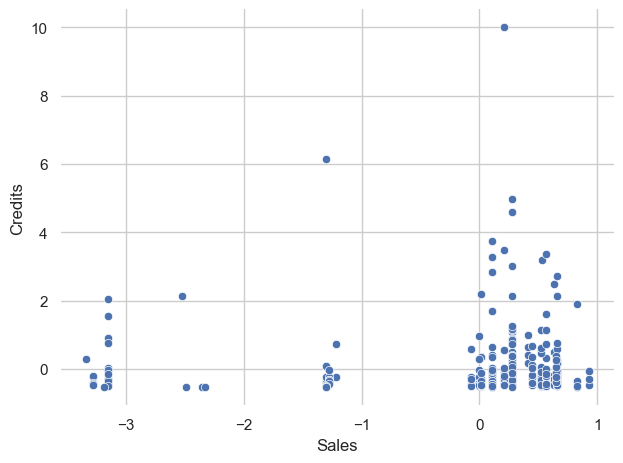

In [42]:
# Creating the scatterplot
sns.scatterplot(x='Sales', y='Credits', data = CreditsSalesApril2023)

# Customizing the plot
# plt.title('Scatterplot')  # Adding a title to the plot
plt.xlabel('Sales')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the y-axis

sns.despine(top=True, right=True, left=True, bottom=True)

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing

plt.savefig('ScatterSales.jpg')
plt.show()

### Variación de créditos en el año

In [52]:
Credits2023 = Credits[(Credits.Date >= '2023-01-01') & (Credits.Date <= '2023-05-31')]

Credits2023.reset_index(drop = True, inplace = True)

In [53]:
Credits2023 = Credits2023.rename(columns = {'Sales': 'Credits'})

In [54]:
Credits2023 = Credits2023[(Credits2023.CreditReason == 'Spoilage - Customer')| (Credits2023.CreditReason == 'Bad Appearance')]

In [55]:
Credits2023 = Credits2023[['Date', 'Credits']]

In [56]:
Credits2023 = Credits2023.groupby(by = 'Date', as_index = False)['Credits'].sum()

In [57]:
# Group the dataframe by month
Credits2023 = Credits2023.groupby(pd.Grouper(key='Date', freq='M')).sum()

# Reset the index to make the 'date' column a regular column instead of the index
Credits2023 = Credits2023.reset_index()

In [58]:
Credits2023

,Date,Credits
0,2023-01-31,33772.42
1,2023-02-28,21193.05
2,2023-03-31,21385.85
3,2023-04-30,39247.88
4,2023-05-31,35906.35


In [59]:
(45411.82/35906.35) -1


0.2647294977072301

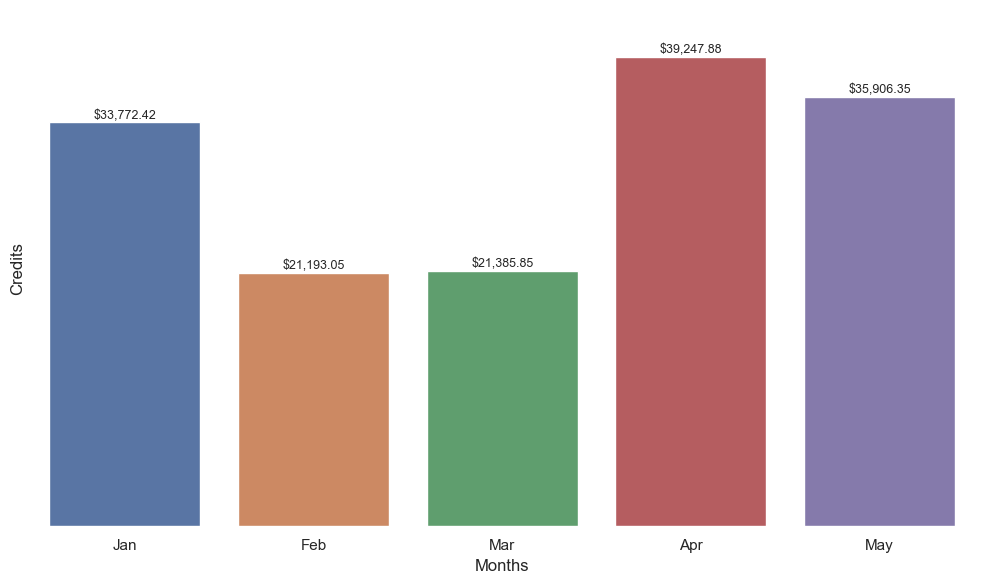

In [60]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='Date', y='Credits', data=Credits2023)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('Months')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis

x_labels = Credits2023['Date'].dt.strftime('%b')  # Custom format for month labels
plt.xticks(range(len(Credits2023['Date'])), x_labels, rotation=0)

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=Credits2023['Credits'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('CreditsbyMonth.jpg')

plt.show()